<a href="https://colab.research.google.com/github/NetoRibeiro/pythonProject/blob/master/TrackingHands_mediapipe_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Hands Solution API in Python (see also http://solutions.mediapipe.dev/hands).

In [2]:
#!pip install mediapipe

Upload any image that contains hand(s) to the Colab. We took two examples from the web: https://unsplash.com/photos/QyCH5jwrD_A and https://unsplash.com/photos/tSePVHkxUCk


In [38]:
from google.colab import files

uploaded = files.upload()

Saving hand_left.jpg to hand_left (1).jpg
Saving hand_right.jpg to hand_right.jpg


hand_left.jpg


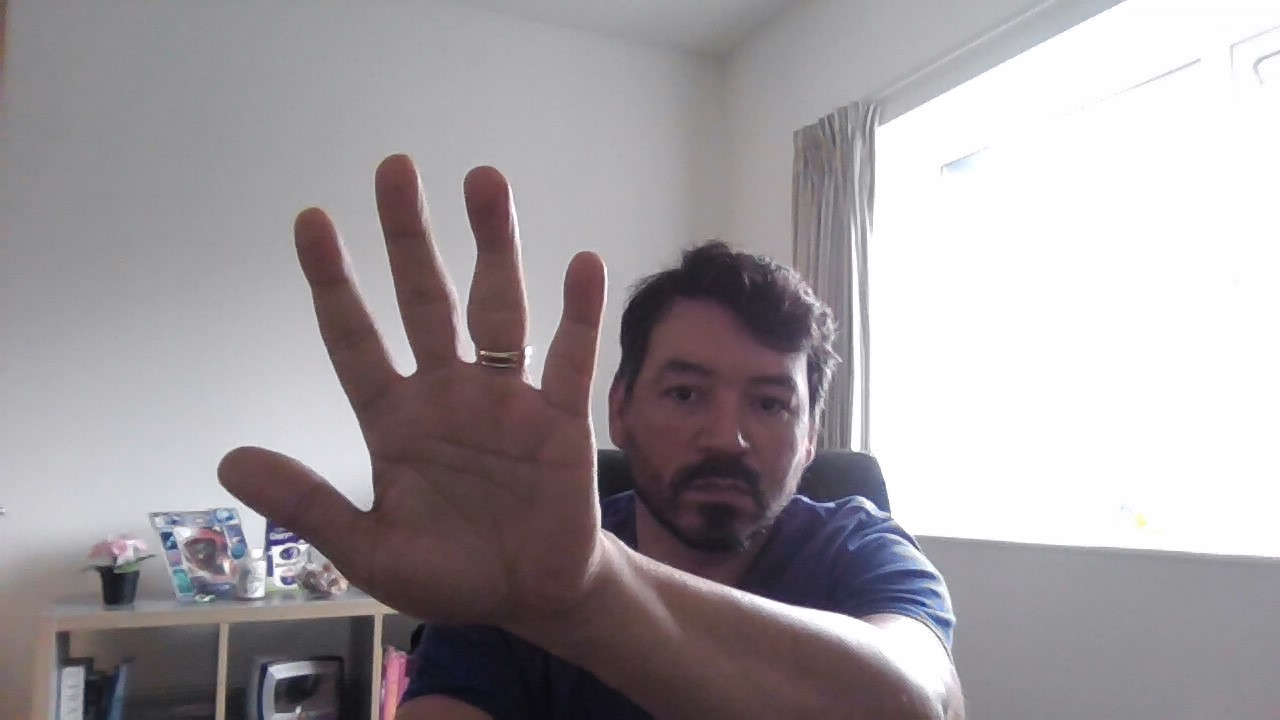

hand_right.jpg


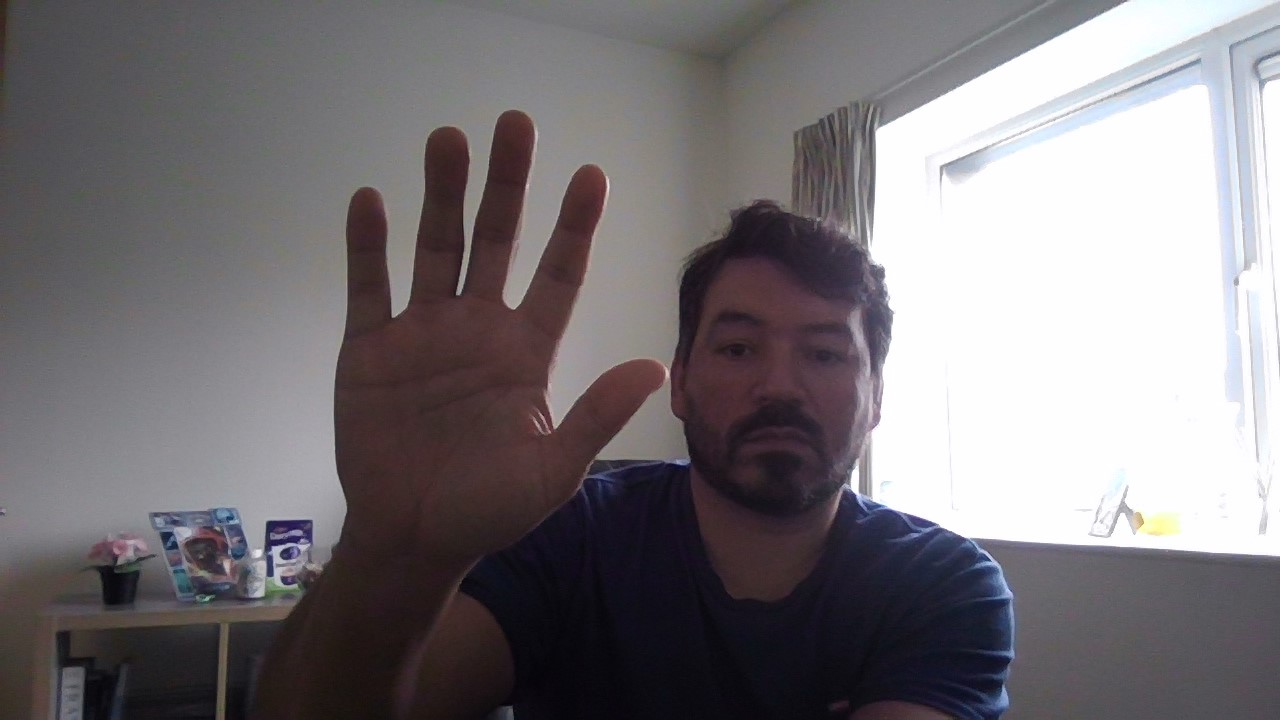

In [39]:
import cv2
from google.colab.patches import cv2_imshow

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Hands solution, we can access this module as `mp_hands = mp.solutions.hands`.

You may change the parameters, such as `static_image_mode`, `max_num_hands`, and `min_detection_confidence`, during the initialization. Run `help(mp_hands.Hands)` to get more informations about the parameters.

In [40]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method

Handedness of hand_left.jpg:
[classification {
  index: 0
  score: 0.9999982714653015
  label: "Left"
}
]
Hand landmarks of hand_left.jpg:
Index finger tip coordinate: ( 966.065673828125, 224.81743812561035)


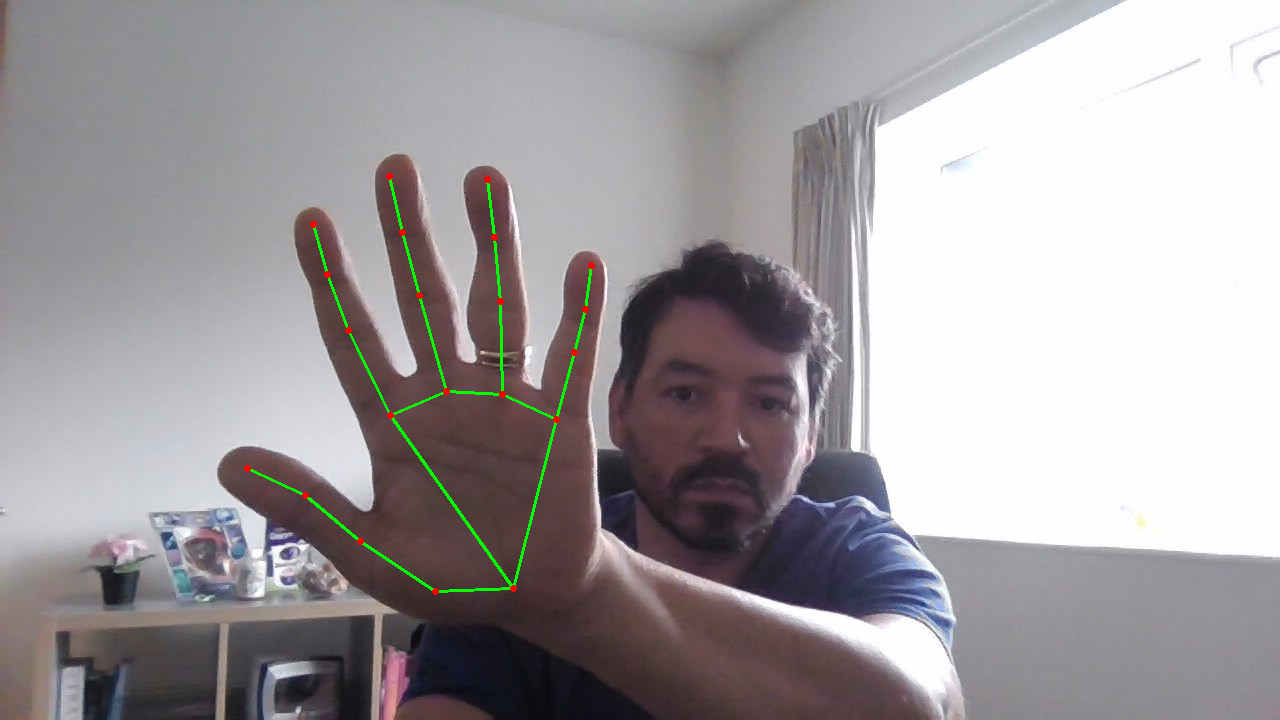

Handedness of hand_right.jpg:
[classification {
  index: 1
  score: 0.9997922778129578
  label: "Right"
}
]
Hand landmarks of hand_right.jpg:
Index finger tip coordinate: ( 690.3941345214844, 184.8356580734253)


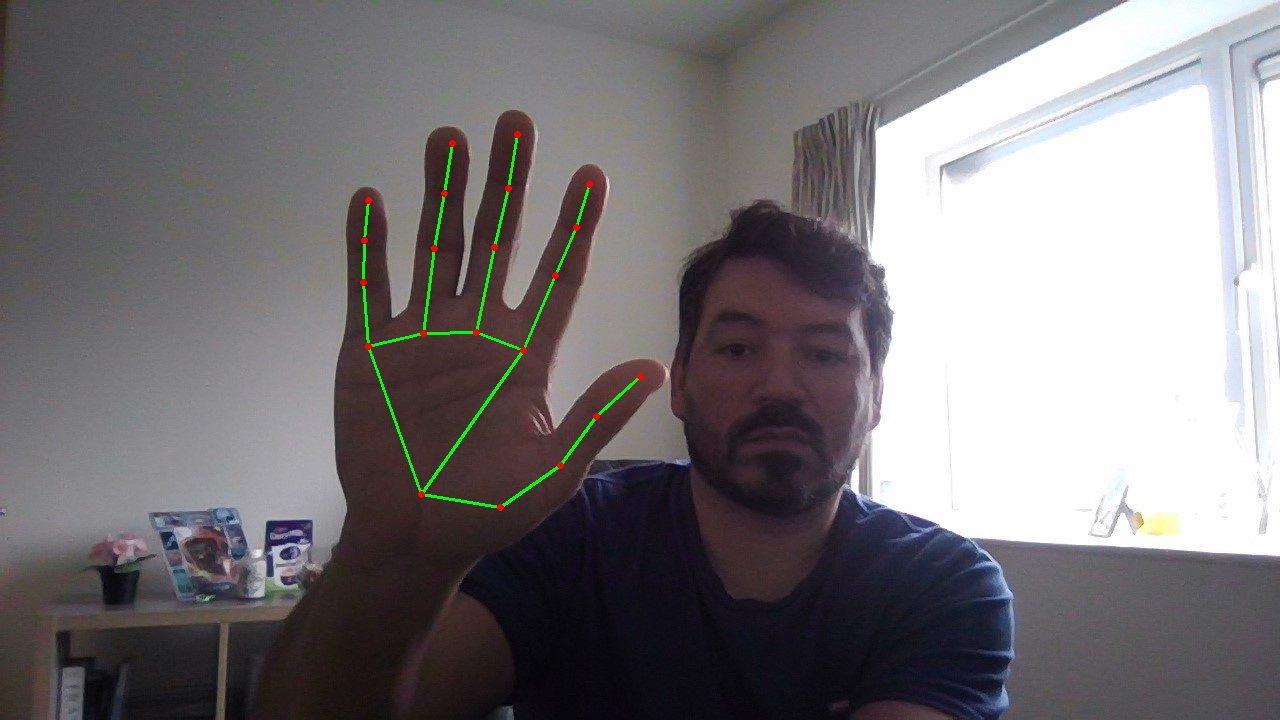

In [41]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
    cv2_imshow(cv2.flip(annotated_image, 1))

In [13]:
import pandas as pd

In [22]:
tong = hand_landmarks.landmark[4]
finger = hand_landmarks.landmark[8]

In [31]:
print(f'{tong.x}\t{finger.x}\n{tong.x - finger.x}')

0.8068599700927734	0.7547388076782227
0.05212116241455078


In [32]:
image.shape

(720, 1280, 3)

In [73]:
results.multi_handedness